In [52]:
import pandas as pd
from matplotlib import pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

In [53]:
df = pd.read_csv('evraz_data.csv', sep=';', decimal=",")

In [54]:
# Убираем столбцы с NaN > 50%

exclude_columns = []
for column in df.columns:
    nas = df[column].isna().sum()
    print(column, nas)
    if nas > len(df)//2:
        exclude_columns.append(column)
    
df = df.drop(columns=exclude_columns)
print(df.shape)
df

Unnamed: 0 0
nplv 0
DT 0
МАРКА 0
ПРОФИЛЬ 0
t вып-обр 597
t обработка 601
t под током 601
t продувка 597
ПСН гр. 1792
чист расход C 606
чист расход Cr 1158
чист расход Mn 610
чист расход Si 610
чист расход V 863
температура первая 605
температура последняя 605
Ar (интенс.) 615
N2 (интенс.) 5652
эл. энергия (интенс.) 601
произв жидкая сталь 597
произв количество обработок 597
произв  количество плавок 597
произв количество плавок (цел) 597
расход газ Ar 615
расход газ  N2 5652
расход C пров. 6317
сыпуч известь РП 2271
сыпуч кварцит 7028
сыпуч кокс пыль УСТК 619
сыпуч  кокс. мелочь (сух.) 7034
сыпуч  кокс. мелочь КМ1 734
сыпуч  шпат плав. 1131
ферспл CaC2 797
ферспл FeMo 7008
ферспл FeSi-75 7036
ферспл FeV азот. 6658
ферспл  FeV-80 862
ферспл  Mn5Si65Al0.5 641
ферспл  Ni H1 пласт. 6959
ферспл SiMn18 643
ферспл  ферванит 6024
ферспл  фх850А 1158
эл. энергия 601
химсталь первый Al_1 597
химсталь первый C_1 597
химсталь первый Cr_1 597
химсталь первый Cu_1 597
химсталь первый Mn_1 597
химста

,Unnamed: 0,nplv,DT,МАРКА,ПРОФИЛЬ,t вып-обр,t обработка,t под током,t продувка,ПСН гр.,...,химшлак первый MnO_1,химшлак первый R_1,химшлак первый SiO2_1,химшлак последний Al2O3,химшлак последний CaO,химшлак последний FeO,химшлак последний MgO,химшлак последний MnO,химшлак последний R,химшлак последний SiO2
0,0,г6837?3<87?,2070-06-21 00:14:00,Э76ХФ,Р65,29.0,45.366667,24.400000,41.033333,NaN,...,0.12,2.6,NaN,NaN,53.4,1.0,5.8,0.15,2.6,NaN
1,1,г683863<886,2070-06-21 01:07:00,Э76ХФ,Р65,26.0,44.066667,13.866667,44.066667,NaN,...,0.14,2.2,NaN,NaN,59.3,0.6,4.1,0.11,2.3,NaN
2,2,г683863<887,2070-06-21 02:00:00,Э76ХФ,Р65,24.0,43.350000,17.950000,43.350000,NaN,...,0.12,2.6,NaN,NaN,57.2,0.5,8.1,0.13,2.3,NaN
3,3,г683863<888,2070-06-21 02:58:00,Э76ХФ,Р65,17.0,46.183333,19.816667,46.183333,NaN,...,0.11,2.4,NaN,NaN,60.3,0.5,6.3,0.12,2.6,NaN
4,4,г683863<889,2070-06-21 03:50:00,Э76ХФ,Р65,20.0,48.500000,17.033333,48.500000,NaN,...,0.12,2.4,NaN,NaN,60.3,0.6,4.5,0.09,2.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7036,7036,г68386398<;,2071-04-21 19:50:00,Э90ХАФ,Р65,41.0,42.333333,23.200000,42.166667,3.380628,...,0.10,2.6,22.2,7.0,60.6,0.4,6.2,0.06,2.7,22.8
7037,7037,г68386398<<,2071-04-21 20:45:00,Э90ХАФ,Р65,36.0,46.533333,16.183333,46.383333,NaN,...,0.10,2.2,24.5,4.9,53.0,0.5,11.1,0.25,2.4,22.3
7038,7038,г68386398<=,2071-04-21 21:34:00,Э90ХАФ,Р65,42.0,47.566667,23.016667,47.100000,2.263004,...,0.13,2.7,20.0,5.2,55.4,0.7,6.7,0.13,2.2,25.0
7039,7039,г68386398<>,2071-04-21 22:25:00,Э90ХАФ,Р65,45.0,46.033333,17.533333,45.683333,3.000000,...,0.18,2.1,24.5,4.9,55.1,0.4,8.9,0.16,2.1,26.0


In [55]:
# Убираем столбцы с одним значением и со 100% уникальностью
exclude_columns = []
for column in df.columns:
    nunique = df[column].nunique()
    print(column, nunique)
    if nunique == 1 or nunique == len(df):
        exclude_columns.append(column)
    
df = df.drop(columns=exclude_columns)
print(df.shape)
df


Unnamed: 0 7041
nplv 7041
DT 7041
МАРКА 18
ПРОФИЛЬ 18
t вып-обр 82
t обработка 816
t под током 1155
t продувка 831
ПСН гр. 4296
чист расход C 6243
чист расход Cr 3115
чист расход Mn 6320
чист расход Si 6265
чист расход V 4645
температура первая 154
температура последняя 109
Ar (интенс.) 6423
эл. энергия (интенс.) 6362
произв жидкая сталь 175
произв количество обработок 3
произв  количество плавок 1
произв количество плавок (цел) 1
расход газ Ar 5548
сыпуч известь РП 441
сыпуч кокс пыль УСТК 306
сыпуч  кокс. мелочь КМ1 652
сыпуч  шпат плав. 177
ферспл CaC2 6
ферспл  FeV-80 650
ферспл  Mn5Si65Al0.5 368
ферспл SiMn18 497
ферспл  фх850А 370
эл. энергия 3132
химсталь первый Al_1 6
химсталь первый C_1 417
химсталь первый Cr_1 371
химсталь первый Cu_1 101
химсталь первый Mn_1 404
химсталь первый Mo_1 24
химсталь первый N_1 18
химсталь первый Ni_1 115
химсталь первый P_1 18
химсталь первый S_1 34
химсталь первый Si_1 384
химсталь первый Ti_1 7
химсталь первый V_1 28
химсталь последний Al 20
хи

,МАРКА,ПРОФИЛЬ,t вып-обр,t обработка,t под током,t продувка,ПСН гр.,чист расход C,чист расход Cr,чист расход Mn,...,химшлак первый MnO_1,химшлак первый R_1,химшлак первый SiO2_1,химшлак последний Al2O3,химшлак последний CaO,химшлак последний FeO,химшлак последний MgO,химшлак последний MnO,химшлак последний R,химшлак последний SiO2
0,Э76ХФ,Р65,29.0,45.366667,24.400000,41.033333,NaN,0.456460,0.059572,0.117446,...,0.12,2.6,NaN,NaN,53.4,1.0,5.8,0.15,2.6,NaN
1,Э76ХФ,Р65,26.0,44.066667,13.866667,44.066667,NaN,0.359285,0.083738,0.160923,...,0.14,2.2,NaN,NaN,59.3,0.6,4.1,0.11,2.3,NaN
2,Э76ХФ,Р65,24.0,43.350000,17.950000,43.350000,NaN,0.331665,0.081490,0.132332,...,0.12,2.6,NaN,NaN,57.2,0.5,8.1,0.13,2.3,NaN
3,Э76ХФ,Р65,17.0,46.183333,19.816667,46.183333,NaN,0.377945,0.133194,0.221605,...,0.11,2.4,NaN,NaN,60.3,0.5,6.3,0.12,2.6,NaN
4,Э76ХФ,Р65,20.0,48.500000,17.033333,48.500000,NaN,0.389875,0.105094,0.169459,...,0.12,2.4,NaN,NaN,60.3,0.6,4.5,0.09,2.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7036,Э90ХАФ,Р65,41.0,42.333333,23.200000,42.166667,3.380628,0.537080,0.105640,0.128626,...,0.10,2.6,22.2,7.0,60.6,0.4,6.2,0.06,2.7,22.8
7037,Э90ХАФ,Р65,36.0,46.533333,16.183333,46.383333,NaN,0.555875,0.122876,0.156558,...,0.10,2.2,24.5,4.9,53.0,0.5,11.1,0.25,2.4,22.3
7038,Э90ХАФ,Р65,42.0,47.566667,23.016667,47.100000,2.263004,0.548385,0.111756,0.124018,...,0.13,2.7,20.0,5.2,55.4,0.7,6.7,0.13,2.2,25.0
7039,Э90ХАФ,Р65,45.0,46.033333,17.533333,45.683333,3.000000,0.601350,0.147896,0.190770,...,0.18,2.1,24.5,4.9,55.1,0.4,8.9,0.16,2.1,26.0


In [56]:
# Убираем NaN'ы
for column in df.columns:
    if column in ['МАРКА', 'ПРОФИЛЬ']:
        continue
    print(column, df[column].mean())
    df[column].fillna(df[column].mean(), inplace=True)
print(df.shape)


t вып-обр 26.49224084419615
t обработка 46.194099378322974
t под током 21.010522774704974
t продувка 46.06305090012415
ПСН гр. 3.0044144825681083
чист расход C 0.4030878719347319
чист расход Cr 0.11769215213326534
чист расход Mn 0.13906832475509254
чист расход Si 0.13056103560877003
чист расход V 0.05136576458400777
температура первая 1567.7717526413921
температура последняя 1587.9738968303293
Ar (интенс.) 11.593261400000001
эл. энергия (интенс.) 12989.038791407158
произв жидкая сталь 114.40425201795468
произв количество обработок 1.0090006207324642
расход газ Ar 15.4505277
сыпуч известь РП 0.1321788260167715
сыпуч кокс пыль УСТК 0.06670647810650888
сыпуч  кокс. мелочь КМ1 0.42016204219121617
сыпуч  шпат плав. 0.05472961086294417
ферспл CaC2 0.020086483119795003
ферспл  FeV-80 0.06136827366887846
ферспл  Mn5Si65Al0.5 0.14343640629687499
ферспл SiMn18 0.2155398562988434
ферспл  фх850А 0.2080389257861635
эл. энергия 4557.236180124223
химсталь первый Al_1 0.0017821229050279332
химсталь пе

In [57]:
# Отделяем y

y_cols = ['химшлак последний Al2O3', 'химшлак последний CaO', 
          'химшлак последний FeO', 'химшлак последний MgO',
          'химшлак последний MnO', 'химшлак последний R',
          'химшлак последний SiO2']

X = df.drop(columns=y_cols)
X = pd.get_dummies(X)
y = df.filter(y_cols)

print(X.shape)
print(y.shape)

(7041, 97)
(7041, 7)


In [58]:
y.describe()

,химшлак последний Al2O3,химшлак последний CaO,химшлак последний FeO,химшлак последний MgO,химшлак последний MnO,химшлак последний R,химшлак последний SiO2
count,7041.000000,7041.000000,7041.000000,7041.000000,7041.000000,7041.000000,7041.000000
mean,4.597912,56.382992,0.585723,9.061990,0.123794,2.361425,23.971700
std,0.787908,3.616211,0.207517,3.026099,0.061788,0.214456,1.795353
min,2.400000,35.900000,0.100000,0.300000,0.040000,1.600000,16.400000
25%,4.200000,54.600000,0.400000,6.900000,0.090000,2.200000,23.000000
50%,4.597912,56.400000,0.585723,9.061990,0.110000,2.300000,23.971700
75%,4.800000,58.600000,0.700000,11.000000,0.140000,2.500000,25.400000
max,14.200000,67.500000,4.200000,32.400000,1.450000,3.100000,28.700000


(0.0, 1.0, 0.0, 1.0)

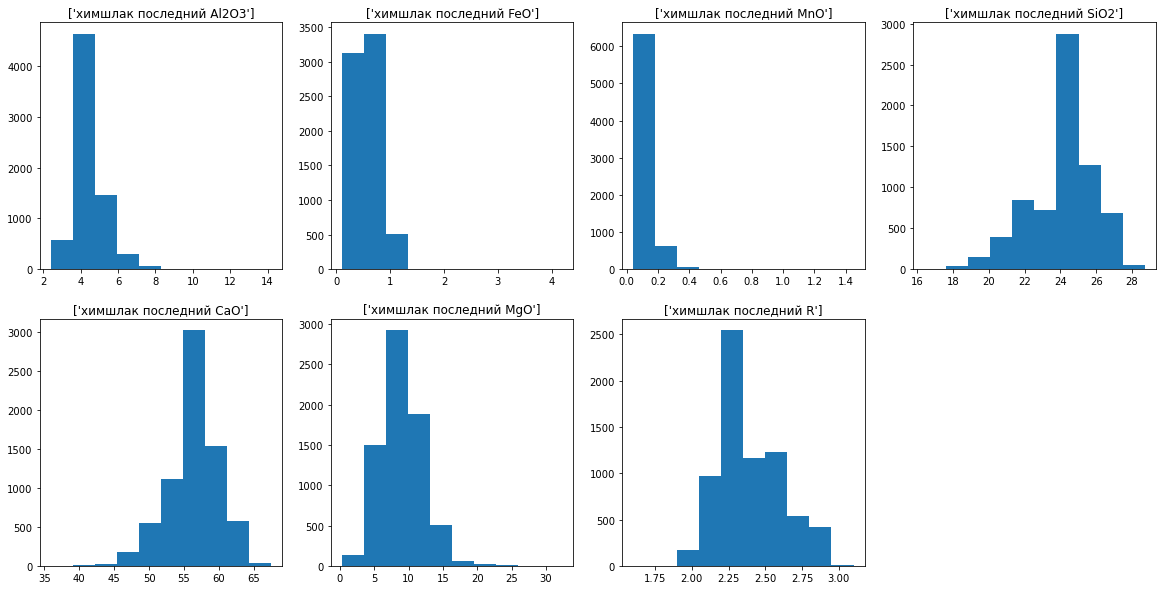

In [59]:
fig, axs = plt.subplots(2, 4, figsize=(20,10))
for i in range(len(y_cols)):
    axs[i%2, i//2].hist(y[y_cols[i]])
    axs[i%2, i//2].set_title([y_cols[i]])
axs[-1,-1].axis('off')

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [61]:
# Baseline
def rmse(predicted, actual):
    return ((predicted - actual)**2).mean()**.5

In [62]:
for y_col in y_cols:
    lr = LinearRegression()
    lr.fit(X_train, y_train[y_col])
    y_pred = lr.predict(X_test)
    print(f'{y_col}\t'
          f'{rmse(y_pred, y_test[y_col])}\t'
          f'{r2_score(y_test[y_col], y_pred)}')

химшлак последний Al2O3	0.6254303016606888	0.403835455118863
химшлак последний CaO	3.197580162140484	0.1773475205635494
химшлак последний FeO	0.20341724582070772	0.004697163255958481
химшлак последний MgO	2.423052437750512	0.35498043166807147
химшлак последний MnO	0.05194423795574883	0.1636831926120671
химшлак последний R	0.17332067103316623	0.336142698102898
химшлак последний SiO2	1.60386431949079	0.16874069212630383


In [63]:
for y_col in y_cols:
    gb = GradientBoostingRegressor()
    gb.fit(X_train, y_train[y_col])
    y_pred = gb.predict(X_test)
    print(f'{y_col}\t'
          f'{rmse(y_pred, y_test[y_col])}\t'
          f'{r2_score(y_test[y_col], y_pred)}')
    

химшлак последний Al2O3	0.6300627714483573	0.3949713433550176
химшлак последний CaO	3.1729992970329848	0.18994691376823925
химшлак последний FeO	0.2008793154356228	0.02937797588157065
химшлак последний MgO	2.415327490742427	0.35908665665376516
химшлак последний MnO	0.05353990836771869	0.11151251821720054
химшлак последний R	0.16416577402603189	0.40442117271310773
химшлак последний SiO2	1.5905439087050595	0.18249090125443146


In [64]:
X.to_csv('X.csv')
y.to_csv('y.csv')